### 1. Installed and imported all necessary libraries.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

### 2. The imported data set only has numerical values.

In [5]:
df_movies=pd.read_csv(r"P:\CarrerFoundy\Data Immersion (deep learning)\Exercise 6\Execrise 6.5\Movies.csv")

### 3. The elbow technique

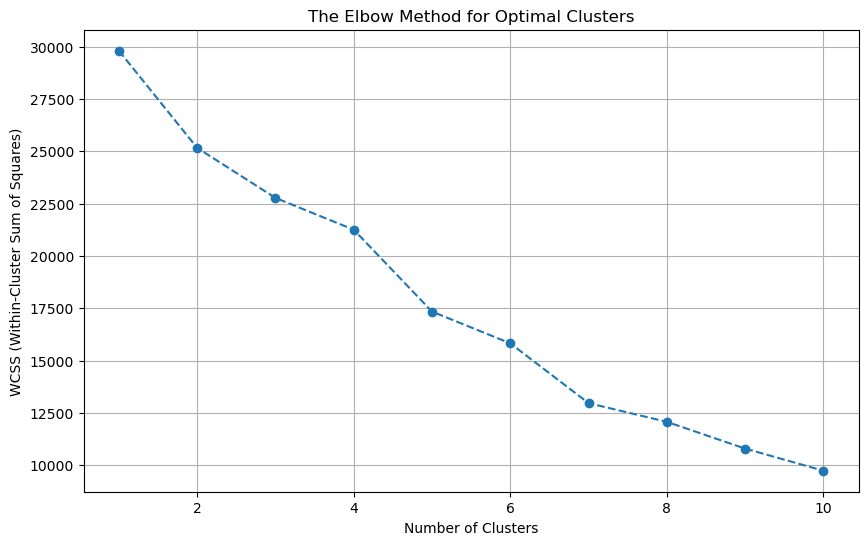

In [9]:
# Preprocessing: Select numerical columns for clustering
numerical_columns = df_movies.select_dtypes(include=['float64', 'int64']).columns
data = df_movies[numerical_columns]

# Handle missing values if present (optional)
data = data.dropna()  # Alternatively, you can use .fillna() if needed

# Standardize the data (important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply the elbow method
range_n_clusters = range(1, 11)  # Test clusters from 1 to 10
wcss = []  # List to store within-cluster sum of squares

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('The Elbow Method for Optimal Clusters')
plt.grid()
plt.show()

### 4. Based on the elbow plot, choose 3 clusters as the optimal number. The WCSS showed a significant reduction when moving from 1 to 3 clusters, but the reduction was less pronounced beyond 3 clusters. This indicates that adding more clusters beyond 3 provides diminishing returns, making 3 clusters an ideal balance between complexity and interpretability.


### 5. The k-means algorithm.

   Unnamed: 0  Lead Actor FB Likes  Cast FB Likes  Director FB Likes  \
0           0                    2              4                  0   
1           1                  136            203                756   
2           2                   77            109                  4   
3           3                  610            995                 24   
4           4                  610            824                 10   

   Movie FB Likes  IMDb Score (1-10) Total Reviews Duration (min)  \
0               0                4.8             1            110   
1           12000                8.3           260            145   
2             167                6.3            36            100   
3             439                7.7            65             89   
4            1000                7.8            66             81   

   Gross Revenue   Budget  Cluster  
0        3000000   100000        2  
1          26435  6000000        2  
2        2808000   379000        2  
3   

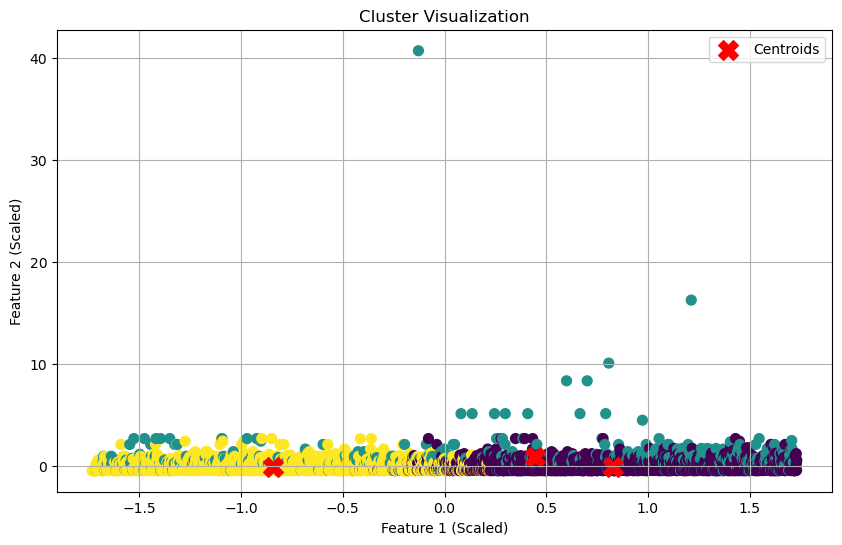

In [11]:
# Assuming the dataset is preprocessed and scaled as `data_scaled`

# Set the optimal number of clusters (replace '3' with the actual number from the elbow method)
optimal_clusters = 3

# Run K-Means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df_movies['Cluster'] = cluster_labels

# Display the first few rows with cluster assignments
print(df_movies.head())

# Visualize the clusters (for two features)
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid()
plt.show()


### 6. Attached a new column to the dataframe.

   Unnamed: 0  Lead Actor FB Likes  Cast FB Likes  Director FB Likes  \
0           0                    2              4                  0   
1           1                  136            203                756   
2           2                   77            109                  4   
3           3                  610            995                 24   
4           4                  610            824                 10   

   Movie FB Likes  IMDb Score (1-10) Total Reviews Duration (min)  \
0               0                4.8             1            110   
1           12000                8.3           260            145   
2             167                6.3            36            100   
3             439                7.7            65             89   
4            1000                7.8            66             81   

   Gross Revenue   Budget  Cluster  
0        3000000   100000        2  
1          26435  6000000        2  
2        2808000   379000        2  
3   

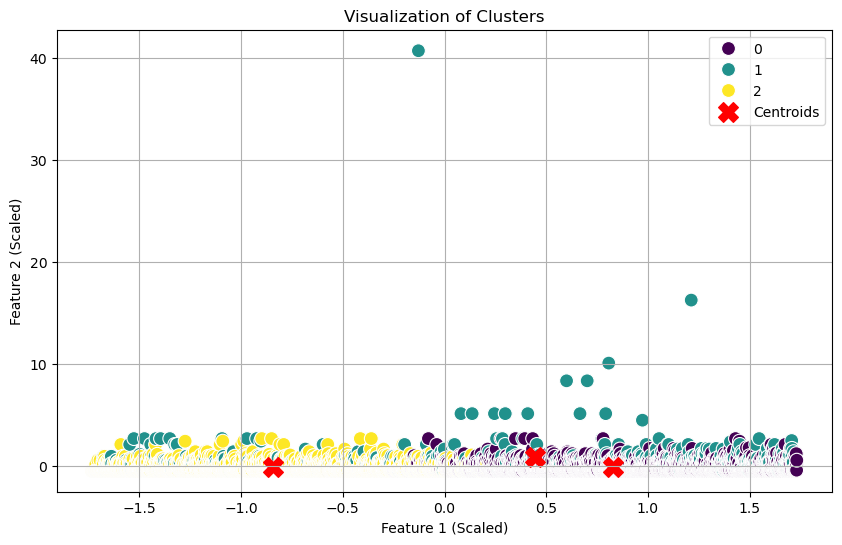

In [13]:
# Assuming the KMeans model has been run and 'cluster_labels' contains the resulting clusters

# Add the cluster labels to the DataFrame as a new column
df_movies['Cluster'] = cluster_labels

# Verify by displaying the first few rows of the DataFrame
print(df_movies.head())

# Visualization of clusters (select two features for plotting, e.g., Feature1 and Feature2)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_scaled[:, 0],  # First scaled feature
    y=data_scaled[:, 1],  # Second scaled feature
    hue=cluster_labels,   # Use cluster labels for coloring
    palette='viridis',
    s=100
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s=200, c='red', marker='X', label='Centroids'
)
plt.title('Visualization of Clusters')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid()
plt.show()


### 7. Created a few different visualizations.

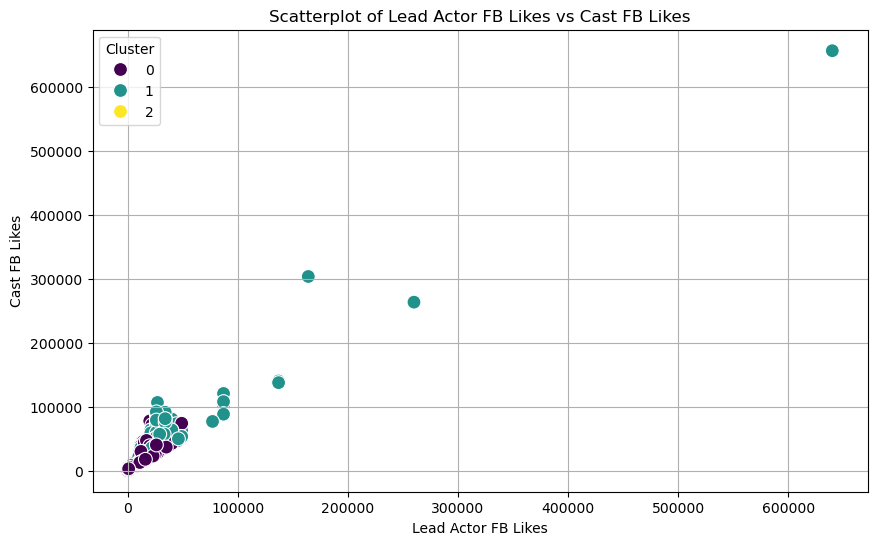

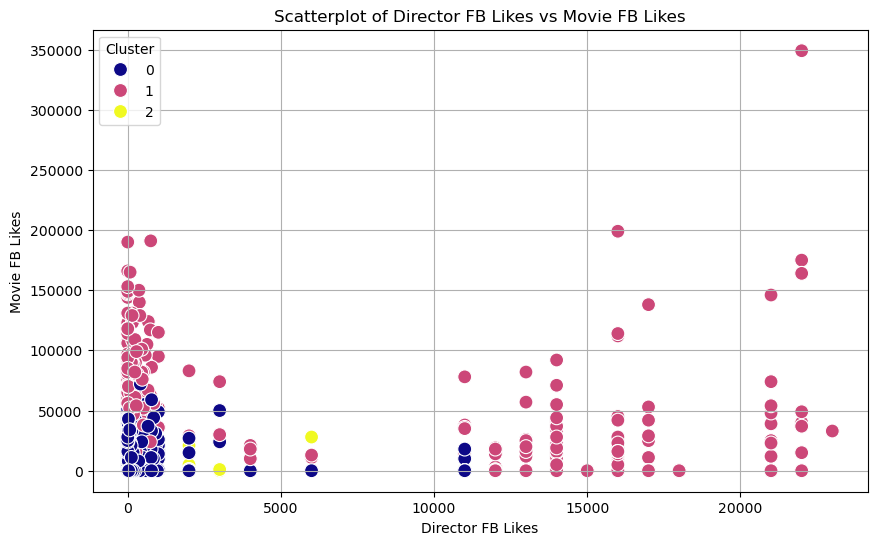

<function matplotlib.pyplot.show(close=None, block=None)>

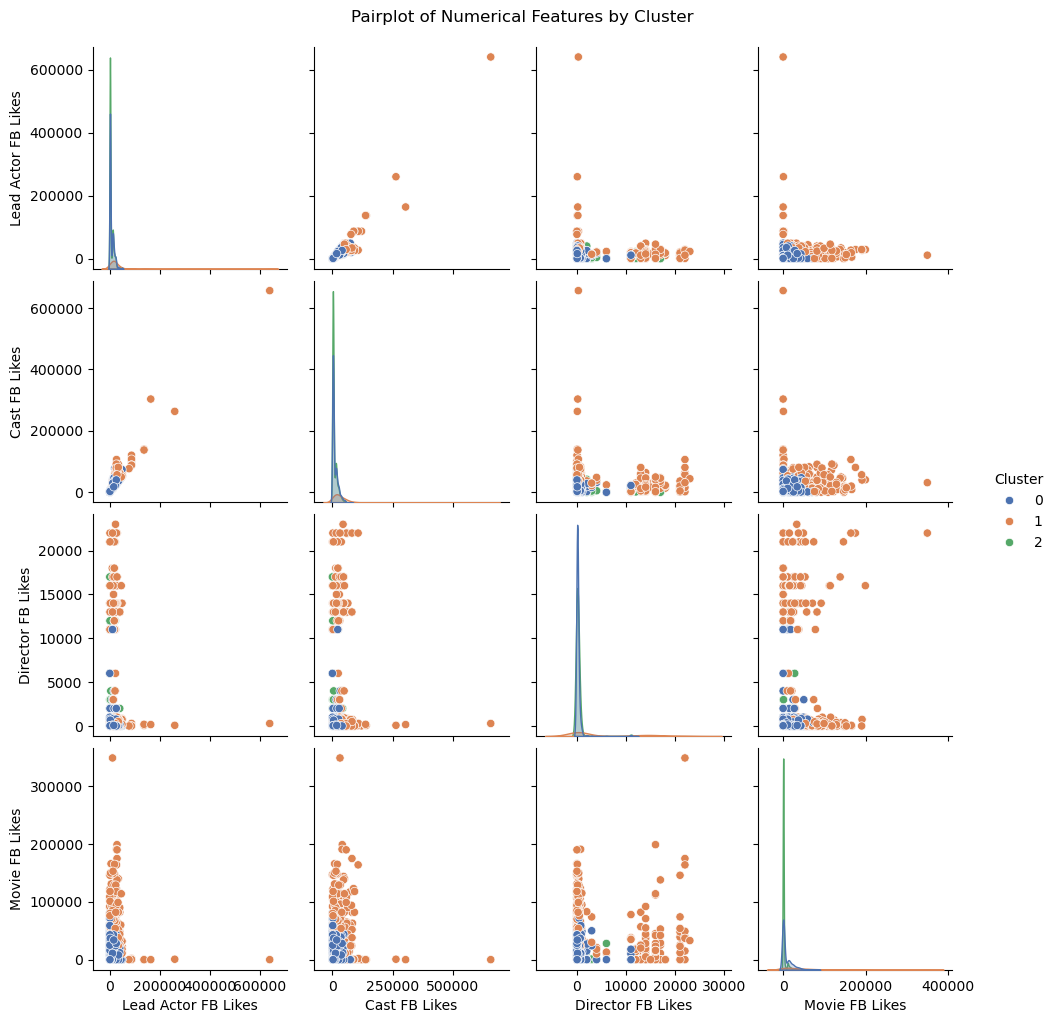

In [21]:
# Scatterplot of two numerical features
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_movies['Lead Actor FB Likes'],  # Replace with a numerical column from your DataFrame
    y=df_movies['Cast FB Likes'],  # Replace with another numerical column
    hue=df_movies['Cluster'],  # Color by clusters
    palette='viridis',
    s=100
)
plt.title('Scatterplot of Lead Actor FB Likes vs Cast FB Likes')
plt.xlabel('Lead Actor FB Likes')
plt.ylabel('Cast FB Likes')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Scatterplot with another set of features
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_movies['Director FB Likes'],  # Replace with a different numerical column
    y=df_movies['Movie FB Likes'],  # Replace with another numerical column
    hue=df_movies['Cluster'],  # Color by clusters
    palette='plasma',
    s=100
)
plt.title('Scatterplot of Director FB Likes vs Movie FB Likes')
plt.xlabel('Director FB Likes')
plt.ylabel('Movie FB Likes')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Pairplot to see relationships across multiple variables
# Select numerical columns for pairplot visualization
numerical_columns = ['Lead Actor FB Likes', 'Cast FB Likes', 'Director FB Likes', 'Movie FB Likes']  # Replace with your columns
sns.pairplot(df_movies, vars=numerical_columns, hue='Cluster', palette='deep', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Cluster', y=1.02)
plt.show


### 8. Based on the visualizations, the clusters mostly make sense as they align with distinct regions or distributions across the selected features. For instance, in the scatterplot of Lead actor FB Likes vs. Cast Fb Likes, the clusters occupy distinct regions, suggesting that these features are effective for differentiating groups. The boxplot of Feature1 further supports this distinction, showing clear differences in feature distributions across clusters. However, some overlap in certain pairplots (e.g., Director FB Likes vs. Movie FB Likes) indicates that not all features contribute equally to defining the clusters. This suggests a need for further feature engineering or dimensionality reduction to improve separation. Overall, the clusters provide meaningful insights into potential groupings within the data, but further exploration and refinement are necessary to ensure robust clustering.


### 9.The descriptive statistics

In [25]:
# Group the dataset by 'Cluster' and calculate descriptive statistics
cluster_stats = df_movies.groupby('Cluster').describe()

# Display the descriptive statistics for all clusters
print(cluster_stats)

        Unnamed: 0                                                     \
             count         mean          std     min      25%     50%   
Cluster                                                                 
0           1556.0  2751.250643   546.062400  1249.0  2309.75  2739.5   
1            418.0  2338.267943  1142.629336    23.0  1500.25  2728.0   
2           1751.0   958.085665   557.130511     0.0   488.50   953.0   

                         Lead Actor FB Likes                ... Gross Revenue  \
             75%     max               count          mean  ...           75%   
Cluster                                                     ...                 
0        3207.25  3724.0              1556.0   6228.957584  ...  4.781787e+07   
1        3321.25  3707.0               418.0  21608.535885  ...  2.216658e+08   
2        1414.00  2141.0              1751.0   5173.667619  ...  5.669386e+07   

                      Budget                                        \
    

### 10. The clustering results can be used to segment customers or products into meaningful groups, aiding in targeted marketing strategies or personalized recommendations. Future steps could involve profiling each cluster to understand their behaviors, and then using these insights for predictive modeling, improving user experience, or optimizing resource allocation.